### Import tensorflow and disable v2

In [1]:
#Importing packages
import time
import tensorflow.compat.v1 as tf
import input_data

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### Load MNIST Data

In [2]:
#MNIST Dataset has 70000 instances of hand written digits from 0-9, each image size is 28*28
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


### Define the Hyperparameter & Data info

In [3]:
#Learning Rate, Iterations, Batch Size Hyperparameters
learning_rate = 0.001
iterations = 20000
batch_size = 128
#dropout = 0.5
#epochs = 10

### Create placeholders for Input(X) and Output(Y)

In [4]:
#Define the placeholders for holding Input and Output Instances
#Here shape is [None, 784], where None means any number of  examples can be passed and 784 stands for 28 * 28
X = tf.placeholder(tf.float32, shape = [None, 784])
#Here shape is [None, 10], where 10 represents number of output classes
Y = tf.placeholder(tf.float32, shape = [None, 10])

### Define the weight matrices

In [5]:
#Defining the weights of 2 hidden layers and output layer
w1 = tf.Variable(tf.truncated_normal([784, 512], stddev = 0.1))
w2 = tf.Variable(tf.truncated_normal([512, 256], stddev = 0.1))
w3 = tf.Variable(tf.truncated_normal([256, 10], stddev = 0.1))

### Define the bias

In [6]:
#Defining the bias of 2 hidden layers and output layer
b1 = tf.Variable(tf.constant(0, shape = [512], dtype = tf.float32))
b2 = tf.Variable(tf.constant(0, shape = [256], dtype = tf.float32))
b3 = tf.Variable(tf.constant(0, shape = [10], dtype = tf.float32))

### Setup the model flow

In [7]:
#Setting the flow -> Input -> L1 -> A1 -> L2 -> A2 -> Ouput
A1 = tf.nn.relu(tf.matmul(X, w1) + b1)
A2 = tf.nn.relu(tf.matmul(A1, w2) + b2)
#drop = tf.nn.dropout(A3, 0.5)
Yhat = tf.nn.softmax(tf.matmul(A2, w3) + b3)

### Define the cost function

In [8]:
#Cost function definition, using the softmax cross entropy loss
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Yhat, labels = Y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### Metrics to check predictions

In [9]:
#To verify the predictions
pred = tf.equal(tf.argmax(Yhat, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))

### Put it all together

In [10]:
#Setup the optimizer function with learning rate as parameter
train_step1 = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
train_step2 = tf.train.AdamOptimizer(learning_rate, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-08).minimize(cross_entropy)
train_step3 = tf.train.AdadeltaOptimizer(learning_rate).minimize(cross_entropy)
train_step4 = tf.train.AdagradOptimizer(learning_rate).minimize(cross_entropy)
train_step5 = tf.train.MomentumOptimizer(learning_rate, momentum = 0.9).minimize(cross_entropy)
train_step6 = tf.train.RMSPropOptimizer(learning_rate, decay = 0.9, epsilon=1e-10).minimize(cross_entropy)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Instantiate the tensorflow global variables -> Graph

In [11]:
#Initialize the Tensorflow Session and global varibales (Get it ready to spawn a Computational Graph)
init = tf.global_variables_initializer()
#sess = tf.Session()
#sess.run(init)

### Let's train for 40000 iterations

In [12]:
#Run the for-loop for a well defined number of epochs
def train(a):
    s = time.clock()
    loss = []
    accuracy1 = []
    
    with tf.Session() as sess:
        sess.run(init)
        for i in range(iterations + 1):

            #Train in mini-batches
            batchX, batchY = mnist.train.next_batch(batch_size)

            #Generate the Computational Graph and train the network
            if a == 1:
                sess.run(train_step1, feed_dict={X: batchX, Y: batchY})
            elif a == 2:
                sess.run(train_step2, feed_dict={X: batchX, Y: batchY})
            elif a == 3:
                sess.run(train_step3, feed_dict={X: batchX, Y: batchY})
            elif a == 4:
                sess.run(train_step4, feed_dict={X: batchX, Y: batchY})
            elif a == 5:
                sess.run(train_step5, feed_dict={X: batchX, Y: batchY})
            elif a == 6:
                sess.run(train_step6, feed_dict={X: batchX, Y: batchY})



            #Print step and cost values at end of every 100th step
            if i % 2000 == 0:
                minibatch_loss, minibatch_accuracy = sess.run([cross_entropy, accuracy], feed_dict={X: batchX, Y: batchY})

                #print('Iteration = {}'.format(i))
                #print('Loss = {}'.format(minibatch_loss))
                #print('Accuracy = {}\n'.format(minibatch_accuracy))

                loss.append(minibatch_loss)
                accuracy1.append(minibatch_accuracy)


        e = time.clock()

        print('Time Elapsed = {} \n'.format(e-s))

        test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
        #print('Accuracy on Test Set is {}'.format(test_accuracy))

        return loss, accuracy1, test_accuracy

In [13]:
GDL, GDA, GDTA = train(1)
AL, AA, ATA = train(2)
ADL, ADA, ADTA = train(3)
AGL, AGA, AGTA = train(4)
ML, MA, MTA = train(5)
RML, RMA, RMTA = train(6)

C:\Users\Pranav\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Pranav\anaconda3\lib\site-packages\ipykernel_launcher.py:42: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Time Elapsed = 163.94535109999998 

Time Elapsed = 172.993249 

Time Elapsed = 188.90554020000002 

Time Elapsed = 190.7575769 

Time Elapsed = 208.3678857 

Time Elapsed = 218.55255240000008 



### Plotting the graphs

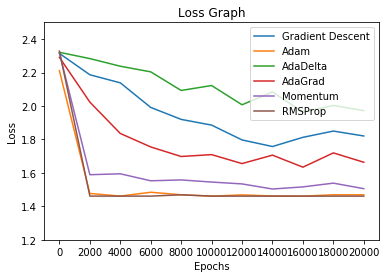

In [14]:
import matplotlib.pyplot as plt
import numpy as np

iterations = np.arange(0, 20001, 2000)
plt.plot(iterations, GDL, label = 'Gradient Descent')
plt.plot(iterations, AL, label = 'Adam')
plt.plot(iterations, ADL, label = 'AdaDelta')
plt.plot(iterations, AGL, label = 'AdaGrad')
plt.plot(iterations, ML, label = 'Momentum')
plt.plot(iterations, RML, label = 'RMSProp')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 20001, 2000))
plt.ylabel('Loss')
plt.ylim(1.2, 2.5) 
plt.legend()
plt.show()

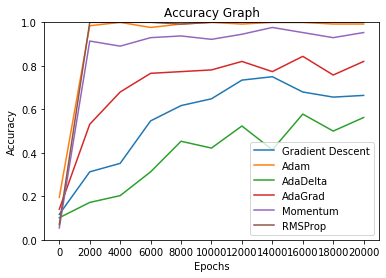

In [15]:
iterations = np.arange(0, 20001, 2000)
plt.plot(iterations, GDA, label = 'Gradient Descent')
plt.plot(iterations, AA, label = 'Adam')
plt.plot(iterations, ADA, label = 'AdaDelta')
plt.plot(iterations, AGA, label = 'AdaGrad')
plt.plot(iterations, MA, label = 'Momentum')
plt.plot(iterations, RMA, label = 'RMSProp')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, 20001, 2000))
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.legend()
plt.show()

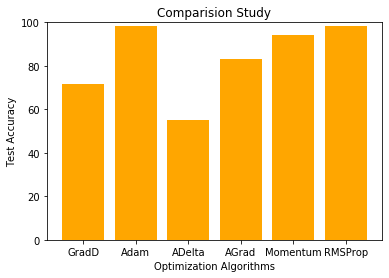

In [16]:
height = [GDTA*100, ATA*100, ADTA*100, AGTA*100, MTA*100, RMTA*100]
bars = ('GradD', 'Adam', 'ADelta', 'AGrad', 'Momentum', 'RMSProp')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color = (1.00, 0.65, 0.00, 1.0))
plt.title('Comparision Study')
plt.xlabel('Optimization Algorithms')
plt.ylabel('Test Accuracy')
plt.ylim(0,100) 
plt.xticks(y_pos, bars)
plt.show()